# ITS488 : Data Science Project > Wine Quality

Presented by

5822790416 Nonwarit Suwanmolee

5822783411 Panjarat Sukonthachartnant

5822792909 Natcha Suttiwattana 

5922800586 Thanadorn Worraphattarachaya


In [0]:
# load the data
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

In [0]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [106]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [107]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [108]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [109]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [110]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [111]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [112]:
white_wine[white_wine.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [113]:
red_wine[red_wine.isnull()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**No missing values in the datasets**

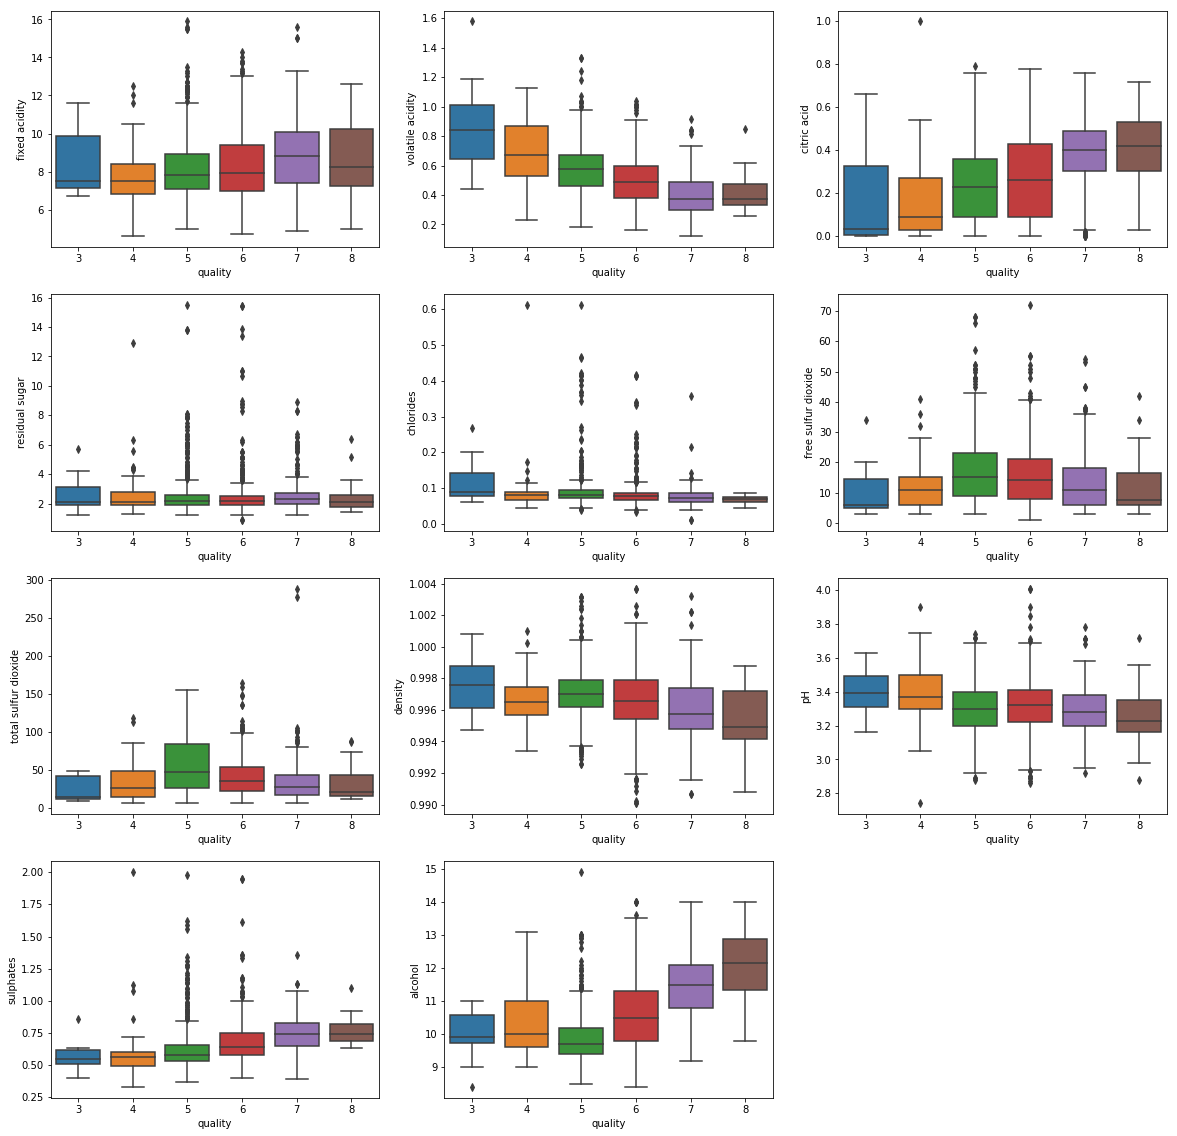

In [114]:
""" Create a box plot for each feature vs quality to see if there are some outliers"""
plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(4,3)

features = list(red_wine.columns)
features.remove("quality")

for f in features:
    ax = plt.subplot(gs[red_wine.columns.get_loc(f)])
    sns.boxplot(red_wine["quality"],red_wine[f])

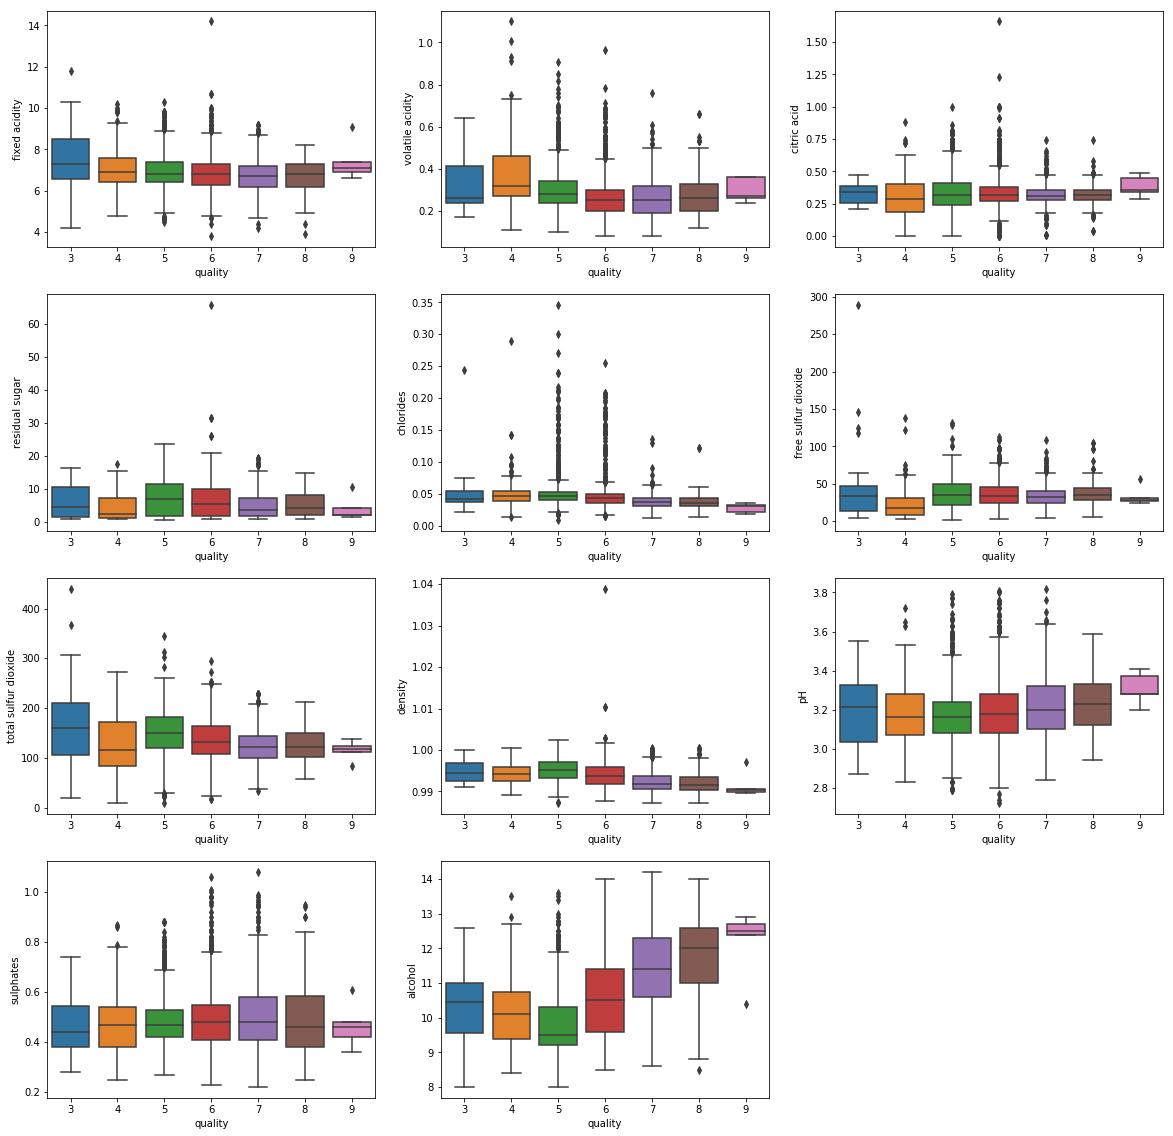

In [115]:
""" Create a box plot for each feature vs quality to see if there are some outliers"""
plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(4,3)

features = list(white_wine.columns)
features.remove("quality")

for f in features:
    ax = plt.subplot(gs[white_wine.columns.get_loc(f)])
    sns.boxplot(white_wine["quality"],white_wine[f])

From the boxplots above we can see that there are outlier in all columns. But I decided not to remove the outliers.

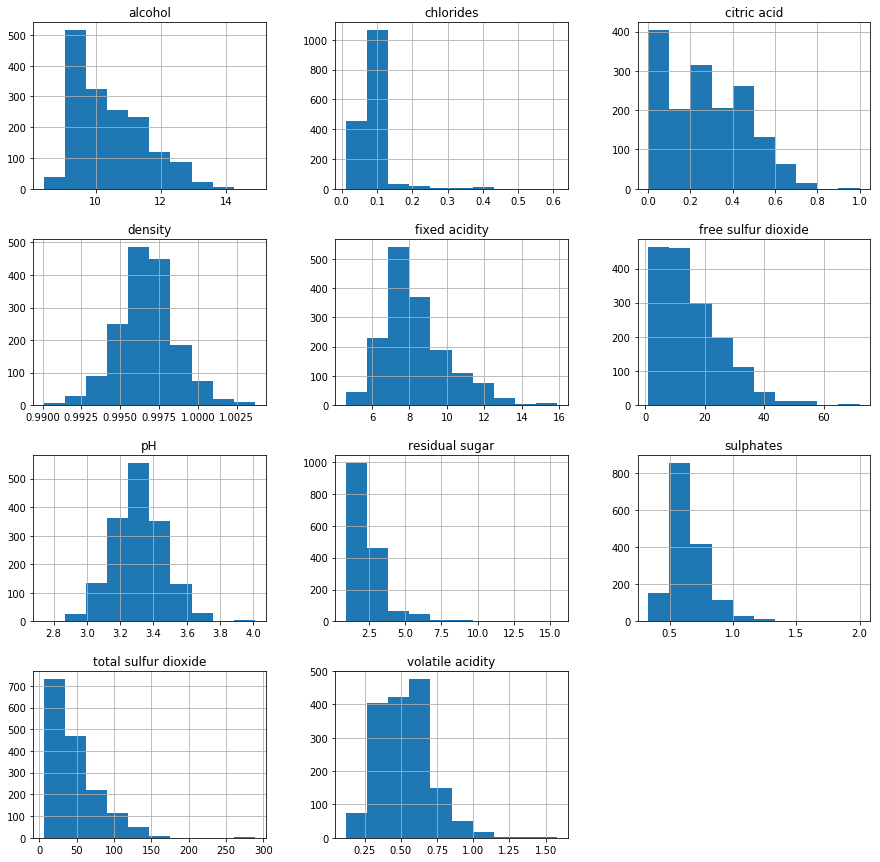

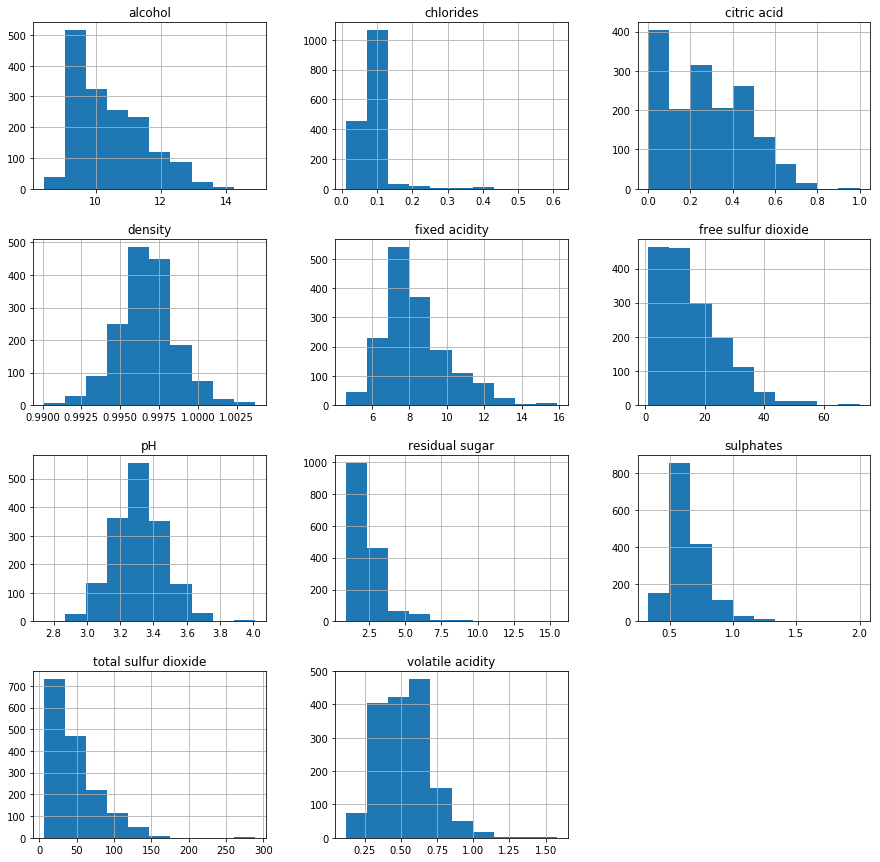

In [116]:
# the distribution of the features 
red_wine.drop("quality",axis=1).hist(figsize=(15,15))
plt.show()

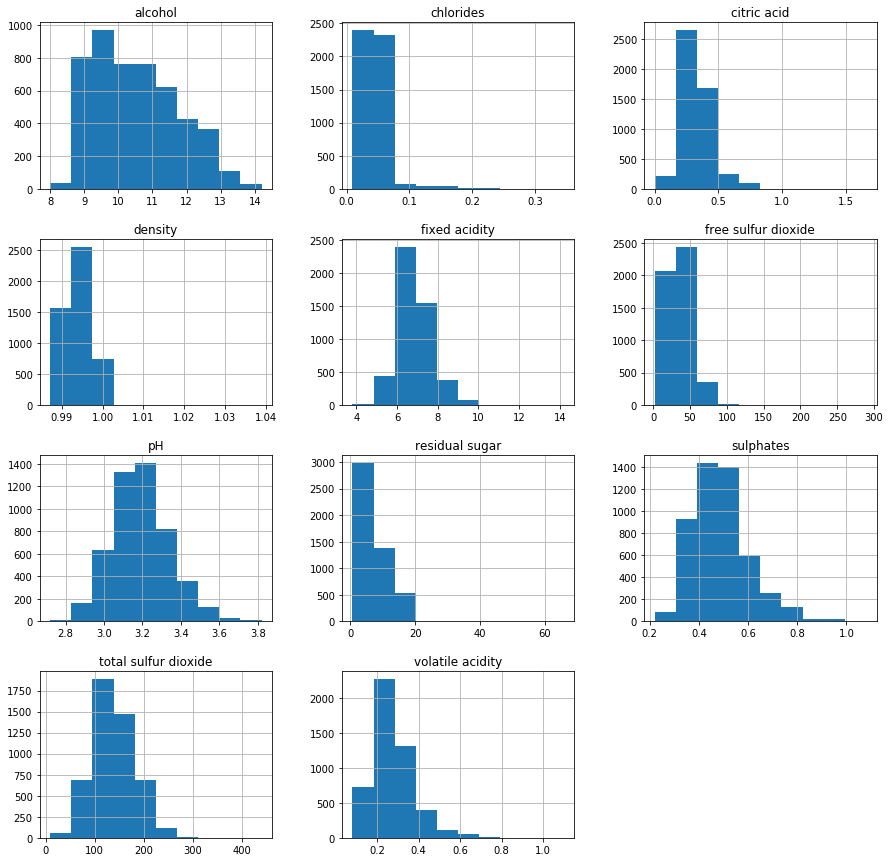

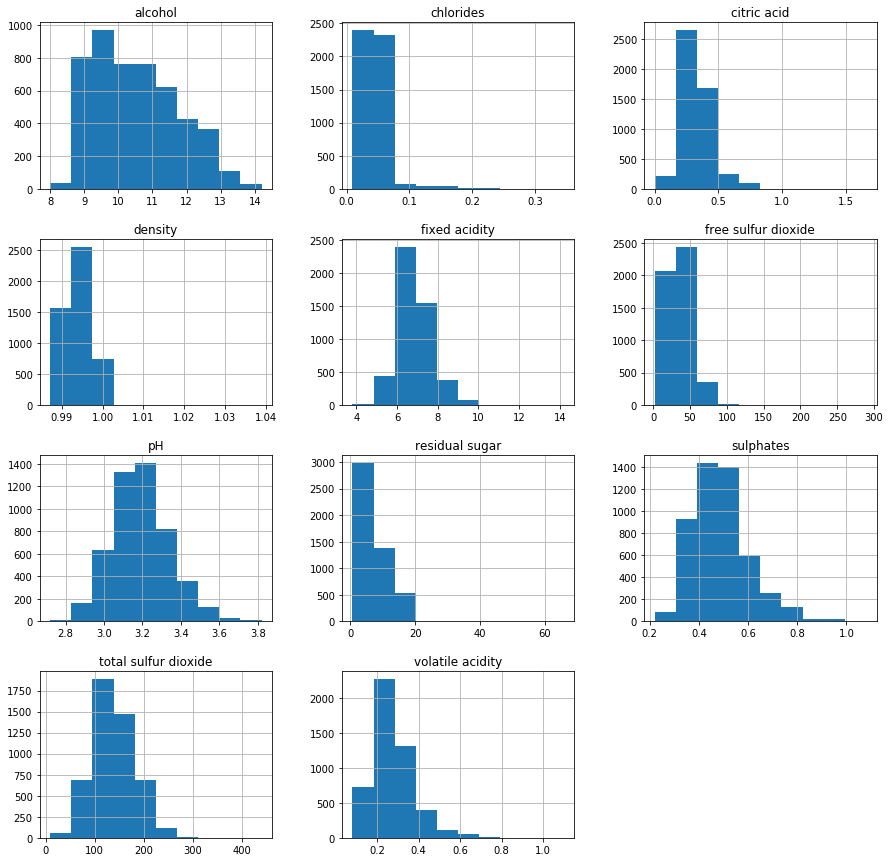

In [117]:
# the distribution of the features 
white_wine.drop("quality",axis=1).hist(figsize=(15,15))
plt.show()

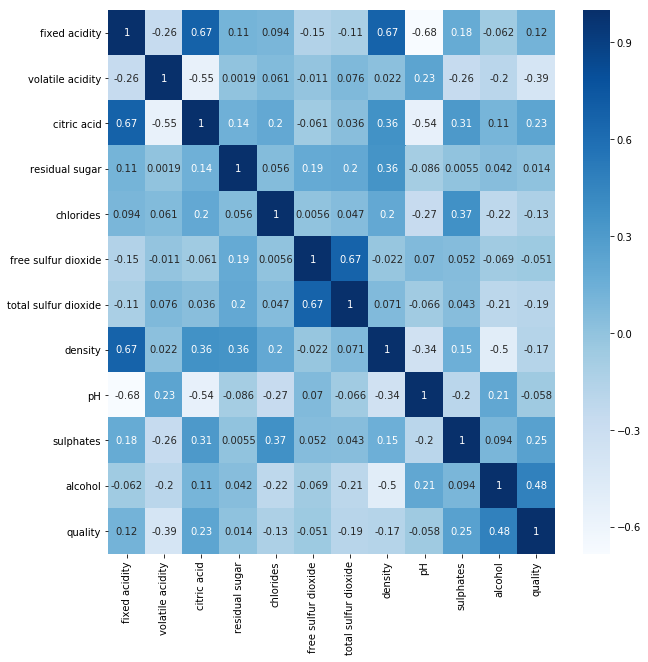

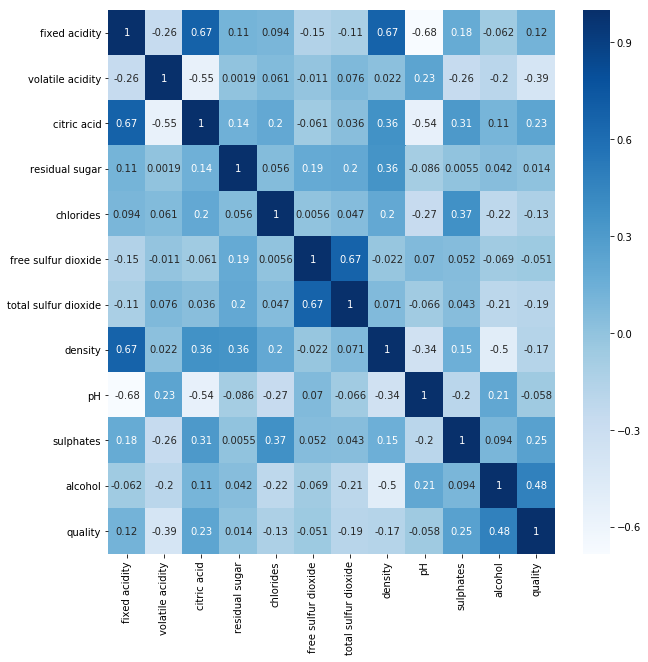

In [118]:
# plot the correlation matrix
plt.figure(figsize=(10,10))

corr_red = red_wine.corr()
sns.heatmap(corr_red, xticklabels=corr_red.columns.values, yticklabels=corr_red.columns.values, cmap="Blues", annot=True)

plt.show()

From the correlation matrix for the red wine, we can see that:

-  there is a week linear relationship between the quality and residual sugar, free sulfur dioxide and pH. 
-  the citric acid and the fixed axidity, and the total sulfur dioxide and the free sulfur dioxide are positivly correlated
-  the pH and the fixed acidity are negativly correlated

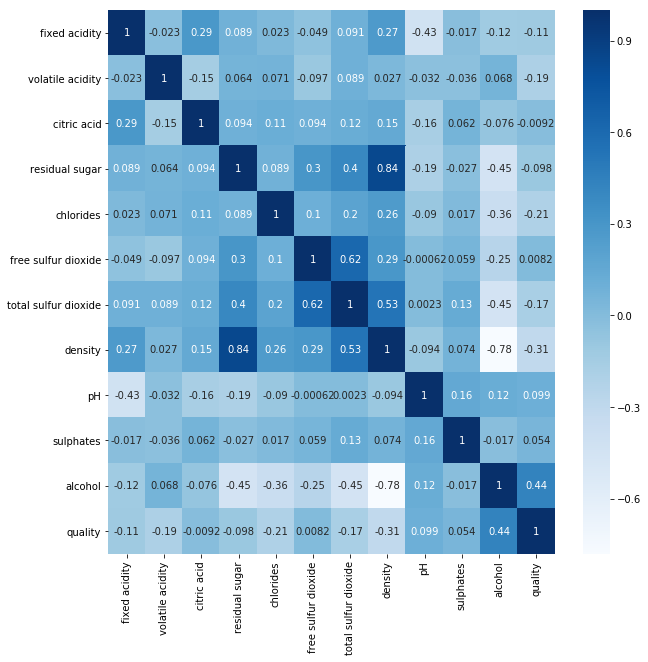

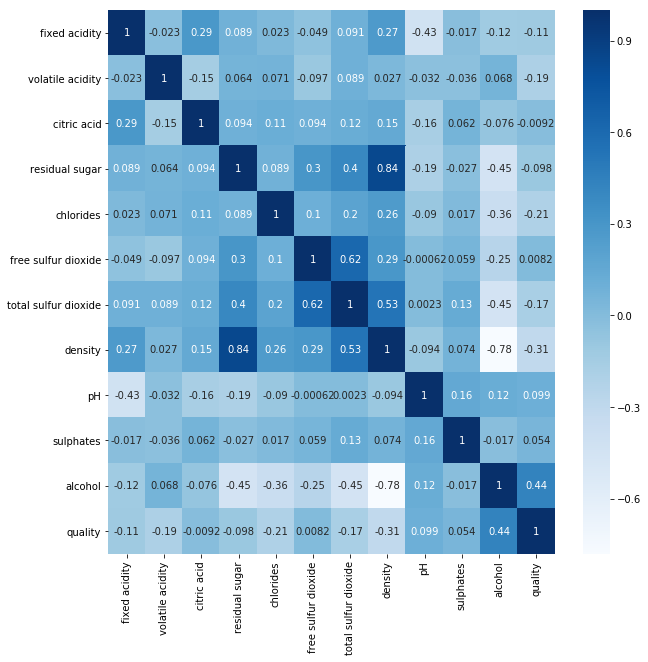

In [119]:
# plot the correlation matrix
plt.figure(figsize=(10,10))

corr_blue = white_wine.corr()
sns.heatmap(corr_blue, xticklabels=corr_blue.columns.values, yticklabels=corr_blue.columns.values, cmap="Blues", annot=True)

plt.show()

From the correlation matrix for the white wine, we can see that:

-  there is a week linear relationship between the quality and residual sugar, free sulfur dioxide and pH. 
-  the density and the residual sugar are highly positivly correlated 
-  the density and the alcohol are highly negativly correlated

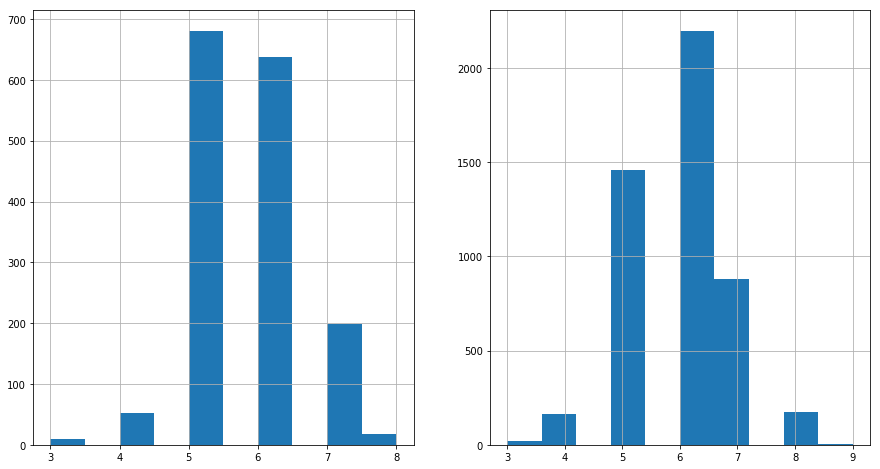

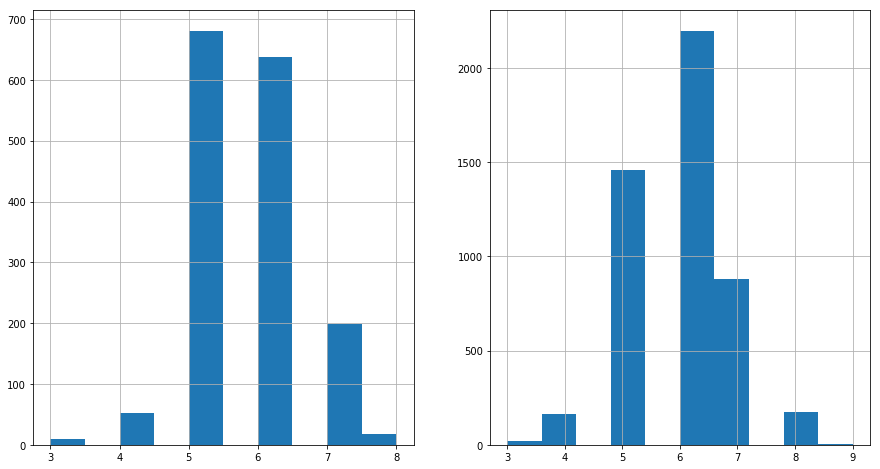

In [120]:
""" Observe the distribution of the labels"""
gs = gridspec.GridSpec(1,2)
plt.figure(figsize=(15,8))

ax1 = plt.subplot(gs[0])
red_wine["quality"].hist()

ax2 = plt.subplot(gs[1])
white_wine["quality"].hist()

From the histogram above we can see that the dataset is unbalanced

In [0]:
# normalize the features using the Z-score
scaler_red = StandardScaler()
scaler_red.fit(red_wine.drop(['quality'],axis=1))
scaled_red = scaler_red.transform(red_wine.drop(['quality'],axis=1))
normalized_red_wine = pd.DataFrame(scaled_red,columns=red_wine.columns[:-1])

In [0]:
# normalize the features using the Z-score
scaler_white = StandardScaler()
scaler_white.fit(white_wine.drop(['quality'],axis=1))
scaled_white = scaler_white.transform(white_wine.drop(['quality'],axis=1))
normalized_white_wine = pd.DataFrame(scaled_white,columns=white_wine.columns[:-1])

In [0]:
# split the datasets for train and test
X_red = normalized_red_wine
y_red = red_wine["quality"]

X_white = normalized_white_wine
y_white = white_wine["quality"]

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2)

## Logistic regression

In [0]:
""" Apply logistic regression to the dataset and print the scores"""
def lr(X_train, y_train, X_test, y_test):
    lr = LogisticRegression()
    # train
    lr.fit(X_train, y_train)
    # test
    pred = lr.predict(X_test)
    # print scores
    print(metrics.classification_report(y_test,pred))
    print("Accuracy: ", metrics.accuracy_score(y_test,pred))

In [125]:
print("******************** Red wine scores *******************************")
lr(X_red_train,y_red_train,X_red_test,y_red_test)

print("\n******************** White wine scores *******************************")
lr(X_white_train,y_white_train,X_white_test,y_white_test)


******************** Red wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.69      0.78      0.73       148
           6       0.58      0.60      0.59       128
           7       0.32      0.25      0.28        28
           8       0.00      0.00      0.00         4

   micro avg       0.62      0.62      0.62       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.58      0.62      0.60       320

Accuracy:  0.621875

******************** White wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        35
           5       0.55      0.52      0.53       278
           6       0.51      0.77      0.62       439
           7       0.51  

## Random forest

In [0]:
""" Apply random forest to the dataset and print the scores"""
def rf(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier()
    # train
    rf.fit(X_train,y_train)
    # test
    pred = rf.predict(X_test)
    # print scores
    print(metrics.classification_report(y_test,pred))
    print("Accuracy: ", metrics.accuracy_score(y_test,pred))

In [127]:
print("******************** Red wine scores *******************************")
rf(X_red_train, y_red_train, X_red_test, y_red_test)

print("******************** White wine scores *******************************")
rf(X_white_train, y_white_train, X_white_test, y_white_test)

******************** Red wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.70      0.82      0.76       148
           6       0.67      0.62      0.65       128
           7       0.50      0.43      0.46        28
           8       0.00      0.00      0.00         4

   micro avg       0.67      0.67      0.67       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.63      0.67      0.65       320

Accuracy:  0.66875
******************** White wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.27      0.11      0.16        35
           5       0.67      0.73      0.70       278
           6       0.67      0.73      0.70       439
           7       0.65    

## Support vector machine

In [0]:
""" Apply SVM to the dataset and print the scores"""
def svm_classifier(X_train, y_train, X_test, y_test):
    svm_c = svm.SVC()
    # train
    svm_c.fit(X_train, y_train)
    #test
    pred = svm_c.predict(X_test)
    # print scores
    print(metrics.classification_report(y_test,pred))
    print("Accuracy: ", metrics.accuracy_score(y_test,pred))

In [129]:
print("******************** Red wine scores *******************************")
svm_classifier(X_red_train, y_red_train, X_red_test, y_red_test)

print("******************** White wine scores *******************************")
svm_classifier(X_white_train, y_white_train, X_white_test, y_white_test)

******************** Red wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.68      0.77      0.72       148
           6       0.61      0.61      0.61       128
           7       0.50      0.46      0.48        28
           8       0.00      0.00      0.00         4

   micro avg       0.64      0.64      0.64       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.61      0.64      0.62       320

Accuracy:  0.640625
******************** White wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.57      0.11      0.19        35
           5       0.59      0.58      0.58       278
           6       0.55      0.76      0.64       439
           7       0.56   

The best results were obtained using Random forest. But stil the score is not very good.

## Feature selection

Lets see if we will get better results by using only the most important features

### a) Feature selection using the correlation matrix

In [0]:
# feature selection using the correlation matrix

X_red_fs = X_red.filter(items=["volatile acidity","citric acid","sulphates","alcohol"])

X_white_fs = X_white.filter(items=["volatile acidity","chlorides","density","alcohol"])

# split the datasets for train and test
X_red_fs_train, X_red_fs_test, y_red_fs_train, y_red_fs_test = train_test_split(X_red_fs, y_red, test_size=0.2)
X_white_fs_train, X_white_fs_test, y_white_fs_train, y_white_fs_test = train_test_split(X_white_fs, y_white, test_size=0.2)

In [131]:
print("Logistic regression: \n")
print("******************** Red wine scores *******************************")
lr(X_red_fs_train,y_red_fs_train,X_red_fs_test,y_red_fs_test)

print("\n******************** White wine scores *******************************")
lr(X_white_fs_train,y_white_fs_train,X_white_fs_test,y_white_fs_test)

print("\nRandom forest: \n")
print("******************** Red wine scores *******************************")
rf(X_red_fs_train,y_red_fs_train,X_red_fs_test,y_red_fs_test)

print("\n******************** White wine scores *******************************")
rf(X_white_fs_train,y_white_fs_train,X_white_fs_test,y_white_fs_test)

print("\nSVM: \n")
print("******************** Red wine scores *******************************")
svm_classifier(X_red_fs_train,y_red_fs_train,X_red_fs_test,y_red_fs_test)

print("\n******************** White wine scores *******************************")
svm_classifier(X_white_fs_train,y_white_fs_train,X_white_fs_test,y_white_fs_test)

Logistic regression: 

******************** Red wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.63      0.81      0.71       134
           6       0.56      0.55      0.56       137
           7       0.43      0.14      0.21        42
           8       0.00      0.00      0.00         2

   micro avg       0.59      0.59      0.59       320
   macro avg       0.27      0.25      0.25       320
weighted avg       0.56      0.59      0.56       320

Accuracy:  0.59375

******************** White wine scores *******************************
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        27
           5       0.57      0.51      0.54       289
           6       0.51      0.78      0.62       453
   

From all of this we can conclude that by removing irrelevant and redundant features the scores have improved a little bit.

### b) Feature selection using feature importance

In [132]:
array = red_wine.values

X_red = array[:,0:11]
y_red = array[:,11]

extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_red,y_red)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
importances_red = extra_tree.feature_importances_
indices_red = np.argsort(importances_red)
indices_red = indices_red[::-1]

print("Feature importance in decreasing order:\n")
for i in range(len(indices_red)):
    print(str(red_wine.columns[indices_red[i]]) + ": " + str(extra_tree.feature_importances_[indices_red[i]]))

Feature importance in decreasing order:

alcohol: 0.15158005186610848
sulphates: 0.11325331039601969
total sulfur dioxide: 0.1019445997452503
volatile acidity: 0.09708386535655011
density: 0.08497617438071003
citric acid: 0.08484994198828381
fixed acidity: 0.07588813916350398
residual sugar: 0.07582520905986775
free sulfur dioxide: 0.07409339869596536
pH: 0.07202477796298343
chlorides: 0.06848053138475708
Feature importance in decreasing order:

alcohol: 0.14417023608238005
total sulfur dioxide: 0.10704599637658378
sulphates: 0.10231179696018836
volatile acidity: 0.09806814112353932
citric acid: 0.08736200799173663
density: 0.08613389562135788
residual sugar: 0.08505729379697416
chlorides: 0.0777060148008952
fixed acidity: 0.07409528349882506
pH: 0.07027246857826595
free sulfur dioxide: 0.06777686516925359


In [134]:
array = white_wine.values

X_white = array[:,0:11]
y_white = array[:,11]

extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_white,y_white)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
importances_white = extra_tree.feature_importances_
indices_white = np.argsort(importances_white)
indices_white = indices_white[::-1]

print("Feature importance in decreasing order:\n")
for i in range(len(indices_white)):
    print(str(white_wine.columns[indices_white[i]]) + ": " + str(extra_tree.feature_importances_[indices_white[i]]))

Feature importance in decreasing order:

alcohol: 0.1266886281231885
volatile acidity: 0.1023644260400041
density: 0.09268572723631308
free sulfur dioxide: 0.09169911826571801
chlorides: 0.09039859063716664
total sulfur dioxide: 0.08704433723540153
residual sugar: 0.08555652719255626
sulphates: 0.08223285515308416
pH: 0.08181180032643223
citric acid: 0.08089477870424312
fixed acidity: 0.07862321108589235
Feature importance in decreasing order:

alcohol: 0.12257573424239228
volatile acidity: 0.09987938642681901
free sulfur dioxide: 0.09004613002555067
total sulfur dioxide: 0.0898902956408314
density: 0.08988522862337742
pH: 0.08810686425195732
chlorides: 0.08725211534206911
residual sugar: 0.0861924885214468
sulphates: 0.08293957861392899
citric acid: 0.0826585735261911
fixed acidity: 0.08057360478543588


In [0]:
# feature selection using feature importance

X_red_fi = normalized_red_wine.filter(items=["alcohol","total sulfur dioxide","sulphates","volatile acidity"])

X_white_fi = normalized_white_wine.filter(items=["alcohol","total sulfur dioxide","free sulfur dioxide","volatile acidity"])

# split the datasets for train and test
X_red_fi_train, X_red_fi_test, y_red_fi_train, y_red_fi_test = train_test_split(X_red_fi, y_red, test_size=0.2)
X_white_fi_train, X_white_fi_test, y_white_fi_train, y_white_fi_test = train_test_split(X_white_fi, y_white, test_size=0.2)

In [137]:
print("Logistic regression: \n")
print("******************** Red wine scores *******************************")
lr(X_red_fi_train,y_red_fi_train,X_red_fi_test,y_red_fi_test)

print("\n******************** White wine scores *******************************")
lr(X_red_fi_train,y_red_fi_train,X_red_fi_test,y_red_fi_test)

print("\nRandom forest: \n")
print("******************** Red wine scores *******************************")
rf(X_red_fi_train,y_red_fi_train,X_red_fi_test,y_red_fi_test)

print("\n******************** White wine scores *******************************")
rf(X_red_fi_train,y_red_fi_train,X_red_fi_test,y_red_fi_test)

print("\nSVM: \n")
print("******************** Red wine scores *******************************")
svm_classifier(X_red_fi_train,y_red_fi_train,X_red_fi_test,y_red_fi_test)

print("\n******************** White wine scores *******************************")
svm_classifier(X_red_fi_train,y_red_fi_train,X_red_fi_test,y_red_fi_test)

Logistic regression: 

******************** Red wine scores *******************************
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00        10
         5.0       0.63      0.81      0.71       139
         6.0       0.58      0.57      0.58       134
         7.0       0.33      0.09      0.15        32
         8.0       0.00      0.00      0.00         1

   micro avg       0.60      0.60      0.60       320
   macro avg       0.26      0.25      0.24       320
weighted avg       0.55      0.60      0.57       320

Accuracy:  0.603125

******************** White wine scores *******************************
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00        10
         5.0       0.63      0.81      0.71       139
         6.0       0.58      0.57      0.58       134
  